# EDA on Sample of RAW Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Cleaned dataset
df = pd.read_csv("/Users/nataliesgarcia/Desktop/dtsc4301/data/Delayed_Cancelled_Flights.csv")

print("Full dataset size:", df.shape)

# Create 10k sample
df_sample = df.sample(n=10000, random_state=42)

# Save sample
df_sample.to_csv("/Users/nataliesgarcia/Desktop/dtsc4301/data/Delayed_Cancelled_Flights_sample.csv", index=False)

print("Sample dataset saved.")
print("Sample size:", df_sample.shape)


Full dataset size: (1531038, 16)
Sample dataset saved.
Sample size: (10000, 16)


Sample dataset size: (10000, 16)

Delayed vs Cancelled Counts:
DELAYED
True     9325
False     675
Name: count, dtype: int64

Average Delay Minutes by Cause:
LATE_AIRCRAFT_DELAY    28.082145
CARRIER_DELAY          24.538338
NAS_DELAY              13.096086
WEATHER_DELAY           4.057265
SECURITY_DELAY          0.125469
dtype: float64

Top 10 Departure Airports with Disruptions:
ORIGIN
DFW    535
ATL    468
DEN    457
ORD    453
CLT    362
LAS    323
LAX    260
SEA    247
MCO    233
EWR    221
dtype: int64


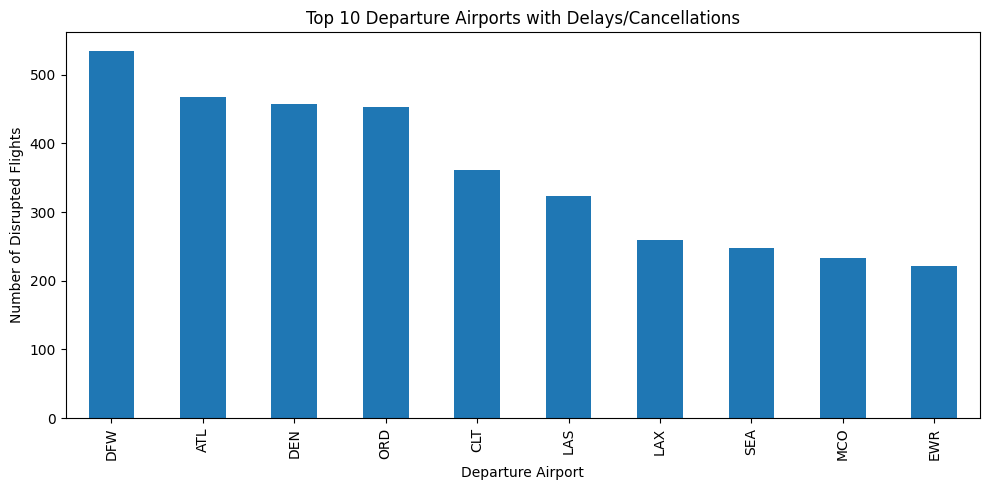

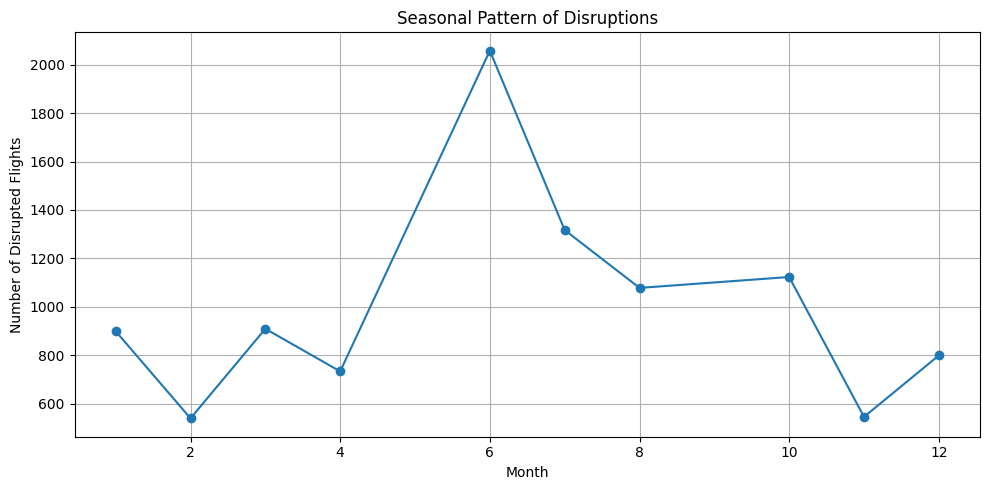

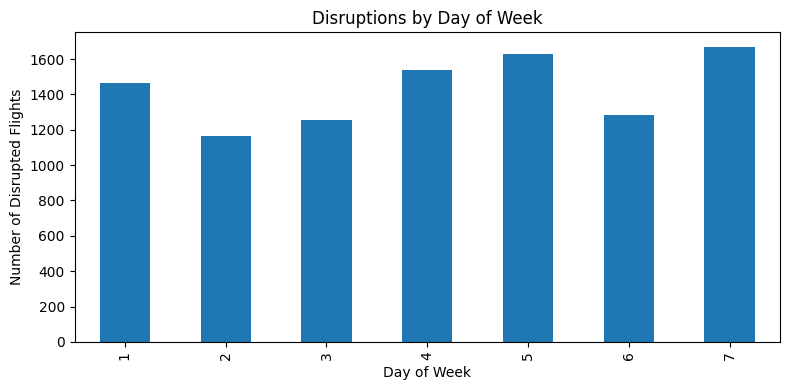

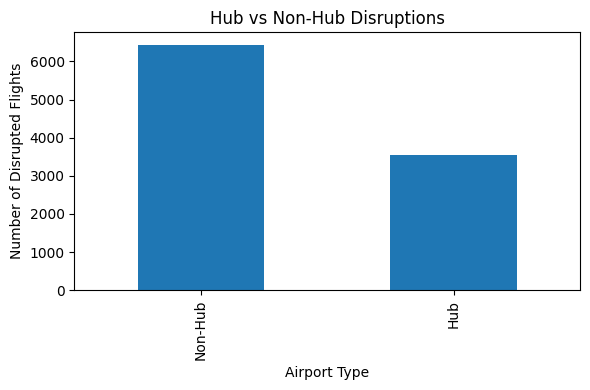


Average Delay Minutes by Hub Status:
            DEP_DELAY  ARR_DELAY
HUB_STATUS                      
Hub         64.852138  67.861053
Non-Hub     67.673960  71.047954


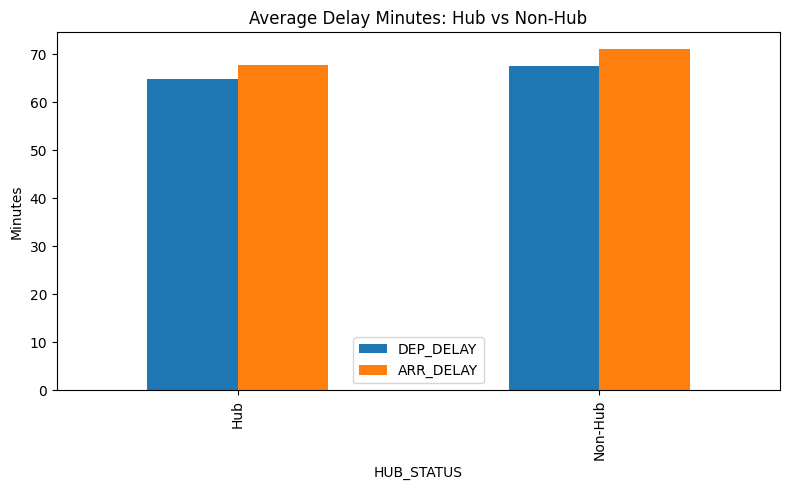

In [3]:

df = pd.read_csv("/Users/nataliesgarcia/Desktop/dtsc4301/data/Delayed_Cancelled_Flights_sample.csv")

print("Sample dataset size:", df.shape)

# BASIC EDA
print("\nDelayed vs Cancelled Counts:")
print(df["DELAYED"].value_counts())

# Delay causes
delay_causes = [
    "WEATHER_DELAY",
    "NAS_DELAY",
    "CARRIER_DELAY",
    "SECURITY_DELAY",
    "LATE_AIRCRAFT_DELAY"
]

print("\nAverage Delay Minutes by Cause:")
print(df[delay_causes].mean().sort_values(ascending=False))

# TOP DEPARTURE AIRPORTS
top_airports = (
    df.groupby("ORIGIN")
      .size()
      .sort_values(ascending=False)
      .head(10)
)

print("\nTop 10 Departure Airports with Disruptions:")
print(top_airports)

top_airports.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Departure Airports with Delays/Cancellations")
plt.xlabel("Departure Airport")
plt.ylabel("Number of Disrupted Flights")
plt.tight_layout()
plt.show()

# SEASONAL ANALYSIS (MONTH)
monthly_disruptions = df.groupby("MONTH").size().sort_index()

monthly_disruptions.plot(marker="o", figsize=(10,5))
plt.title("Seasonal Pattern of Disruptions")
plt.xlabel("Month")
plt.ylabel("Number of Disrupted Flights")
plt.grid(True)
plt.tight_layout()
plt.show()

# DAY OF WEEK ANALYSIS
dow_disruptions = df.groupby("DAY_OF_WEEK").size().sort_index()

dow_disruptions.plot(kind="bar", figsize=(8,4))
plt.title("Disruptions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Disrupted Flights")
plt.tight_layout()
plt.show()

# HUB VS NON-HUB
hub_airports = top_airports.index.tolist()

df["HUB_STATUS"] = df["ORIGIN"].apply(
    lambda x: "Hub" if x in hub_airports else "Non-Hub"
)

hub_counts = df["HUB_STATUS"].value_counts()

hub_counts.plot(kind="bar", figsize=(6,4))
plt.title("Hub vs Non-Hub Disruptions")
plt.xlabel("Airport Type")
plt.ylabel("Number of Disrupted Flights")
plt.tight_layout()
plt.show()

# HUB VS NON-HUB AVERAGE DELAYS
hub_delay_stats = (
    df.groupby("HUB_STATUS")[["DEP_DELAY", "ARR_DELAY"]]
      .mean()
)

print("\nAverage Delay Minutes by Hub Status:")
print(hub_delay_stats)

hub_delay_stats.plot(kind="bar", figsize=(8,5))
plt.title("Average Delay Minutes: Hub vs Non-Hub")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

